In [3]:
import pandas as pd
df_speech = pd.read_csv("feats/speech.csv")
df_cough = pd.read_csv("feats/cough.csv")
df_breathing = pd.read_csv("feats/breathing.csv")
df_speech.shape, df_cough.shape, df_breathing.shape

((1569, 6375), (1569, 6375), (1569, 6375))

In [4]:
meta = pd.read_csv('/Volumes/Datasets/Github/MuDiCov/data/metadata.csv')

## Adding Target and Ids to the features dataframe

In [5]:
labels_train = open("data/train_labels").readlines()
label_df = pd.DataFrame()
ids = []
label_list = []
for i in range(0, len(labels_train)):
    ids.append(labels_train[i][0:-3]) # 28 char of len
    if labels_train[i][-2:-1] == 'p':
        label_list.append(1) # c1 char of len
    elif labels_train[i][-2:-1] == 'n':
        label_list.append(0)

labels = open("data/test_labels").readlines()
for i in range(0, len(labels)):
    ids.append(labels[i][0:-3]) # 28 char of len
    if labels[i][-2:-1] == 'p':
        label_list.append(1) # c1 char of len
    elif labels[i][-2:-1] == 'n':
        label_list.append(0)
        
label_df['id'] = ids
label_df['target'] = label_list


In [6]:
speech_meta = pd.DataFrame()
for i in range(0, len(ids)):
    junk = (df_speech.loc[df_speech['file_name'] == ids[i]])
    junk = junk.drop(columns=["Unnamed: 0"])
    junk['target'] = label_list[i]
    speech_meta = speech_meta.append(junk, ignore_index = True)

In [7]:
speech_meta.head()

,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,audspec_lengthL1norm_sma_iqr2-3,audspec_lengthL1norm_sma_iqr1-3,audspec_lengthL1norm_sma_percentile1.0,...,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope,file_name,target
0,5.359156,0.295588,0.650735,0.285047,0.789664,1.936082,0.504617,1.146418,1.651035,0.050911,...,3.287023,3.274830,19.953285,0.629892,148.976750,68.281190,147.693860,80.129970,00xKcQMmcAhX8CODgBBLOe7Dm0T2,1
1,4.880406,0.232143,0.000000,0.385948,1.144813,2.722129,0.758865,1.577315,2.336181,0.074010,...,2.574878,2.582385,-19.980068,0.686951,112.108960,52.973595,116.021095,56.754864,03TmwzsdEBVEh35MRMbC9d0NnfI3,0
2,3.719348,0.484694,0.000000,0.345256,0.889776,1.329046,0.544520,0.439270,0.983790,0.013562,...,2.530578,2.523160,19.979652,0.665365,109.586815,58.573902,106.088630,59.280396,05acPS4aRGfvuOfku11Za8zve8i2,1
3,7.463596,0.258020,0.288006,0.067661,0.752331,2.147686,0.684670,1.395356,2.080025,0.027113,...,2.837591,2.850553,-19.909657,0.692949,117.336980,58.122086,105.489630,59.714690,05bieNLXPuaIWEVaX81EkbbjVrh1,0
4,6.523770,0.464889,0.639142,0.048085,0.260333,0.782908,0.212248,0.522575,0.734823,0.015928,...,2.146516,2.148726,-19.999878,0.601172,98.114900,51.515810,99.716570,48.305970,0EAAFsDWfTcrhktHy78LS6nf19G3,0


In [145]:
speech_feature_corelation = []
for col in df_speech.columns.drop(["Unnamed: 0", "file_name"]):
    column_1 = speech_meta["target"]
    column_2 = speech_meta[col]
    correlation = column_1.corr(column_2)
    speech_feature_corelation.append(correlation)

(array([  11.,  121.,  490., 1254., 1458., 1272.,  816.,  691.,  219.,
          41.]),
 array([-0.19886984, -0.16001965, -0.12116946, -0.08231927, -0.04346907,
        -0.00461888,  0.03423131,  0.0730815 ,  0.1119317 ,  0.15078189,
         0.18963208]),
 <BarContainer object of 10 artists>)

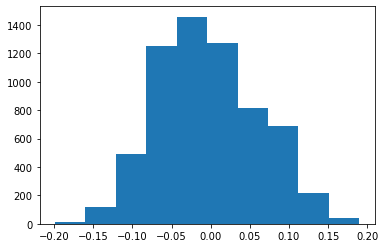

In [151]:
import matplotlib.pyplot as plt
plt.hist(speech_feature_corelation)

# T test 

In [ ]:
speech_feature_corelation = []
for col in df_speech.columns.drop(["Unnamed: 0", "file_name"]):
    column_1 = speech_meta["target"]
    column_2 = speech_meta[col]
    correlation = column_1.corr(column_2)
    speech_feature_corelation.append(correlation)

In [165]:
speech_meta.corr()

,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,audspec_lengthL1norm_sma_iqr2-3,audspec_lengthL1norm_sma_iqr1-3,audspec_lengthL1norm_sma_percentile1.0,...,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope,target
audspec_lengthL1norm_sma_range,1.000000,0.019643,0.008473,-0.138547,0.079741,0.389413,0.314130,0.544633,0.529166,-0.232796,...,-0.005780,0.224700,0.212581,-0.045743,0.053668,0.181443,0.185687,0.202474,0.200044,-0.042978
audspec_lengthL1norm_sma_maxPos,0.019643,1.000000,-0.013268,-0.054014,-0.055374,0.012711,-0.032270,0.084200,0.045090,-0.005379,...,-0.008019,-0.045469,-0.045862,-0.000971,-0.010683,-0.042488,-0.008798,-0.038990,-0.017951,0.065163
audspec_lengthL1norm_sma_minPos,0.008473,-0.013268,1.000000,0.081594,0.031952,0.034666,-0.043771,0.020009,-0.005684,0.137027,...,0.031459,-0.012554,-0.002914,0.086429,-0.016560,0.059926,-0.041315,0.086141,-0.041433,-0.056085
audspec_lengthL1norm_sma_quartile1,-0.138547,-0.054014,0.081594,1.000000,0.843096,0.505847,0.271579,-0.139752,0.024197,0.815377,...,-0.097703,-0.024852,0.037779,-0.043335,-0.183434,0.130576,-0.042915,-0.022382,-0.084399,0.130073
audspec_lengthL1norm_sma_quartile2,0.079741,-0.055374,0.031952,0.843096,1.000000,0.796293,0.746519,0.154843,0.448985,0.516624,...,-0.117079,0.115568,0.162743,-0.063356,-0.124383,0.182495,0.070362,0.082874,0.041533,0.145430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mfcc_sma_de[14]_meanRisingSlope,0.181443,-0.042488,0.059926,0.130576,0.182495,0.216843,0.165046,0.145069,0.177914,0.036392,...,-0.040935,0.831286,0.865390,-0.037680,-0.046983,1.000000,0.778828,0.756903,0.678021,0.029989
mfcc_sma_de[14]_stddevRisingSlope,0.185687,-0.008798,-0.041315,-0.042915,0.070362,0.159122,0.179022,0.179267,0.208529,-0.127151,...,-0.079707,0.772919,0.777274,-0.025211,-0.011358,0.778828,1.000000,0.626725,0.680799,-0.028003
mfcc_sma_de[14]_meanFallingSlope,0.202474,-0.038990,0.086141,-0.022382,0.082874,0.163099,0.176010,0.171426,0.201597,-0.142952,...,0.031689,0.818478,0.791311,-0.021151,0.052977,0.756903,0.626725,1.000000,0.721318,0.007892
mfcc_sma_de[14]_stddevFallingSlope,0.200044,-0.017951,-0.041433,-0.084399,0.041533,0.137986,0.178756,0.177776,0.207350,-0.159721,...,-0.044092,0.774451,0.771456,-0.055154,-0.004134,0.678021,0.680799,0.721318,1.000000,-0.002037


In [105]:
val = list(important_features.values())
key = list(important_features.keys())

In [102]:
res = sorted(range(len(val)), key = lambda sub: val[sub])[:10]

In [165]:
from bioinfokit.analys import stat
res = stat()

In [ ]:
from bioinfokit.analys import stat
important_features = {}
for col in df_speech.columns.drop(["Unnamed: 0", "file_name"]):
    res = stat()
    res.ttest(df = speech_meta, xfac="target", res = col, test_type=2, evar=False)
    p_two_tail = float(res.summary.split("\n")[9].split()[-1])
    if p_two_tail < 0.05:
        important_features[col] = p_two_tail
        

In [69]:
print(res.summary.split("\n")[9].split()[-1])

0.205709


In [120]:
feat_list = list(speech_meta.columns)

In [128]:
def unique(list1):
    # initialize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    return

In [156]:
feat_names = {}
for i in range(0, len(feat_list) - 1):
    feat_name_i = "_".join(feat_list[i].split("_")[0:-1])
    feat_name_ip1 = "_".join(feat_list[i + 1].split("_")[0:-1])
    if feat_name_i == feat_name_ip1:
        if feat_name_i not in feat_names.keys():
            feat_names[feat_name_i] = []
        feat_names[feat_name_i].append(feat_list[i].split("_")[-1])

In [ ]:
list(feat_names.keys())

In [163]:
import opensmile 
opensmile.FeatureLevel.LowLevelDescriptors

<FeatureLevel.LowLevelDescriptors: 'lld'>

In [166]:
df_speech

,Unnamed: 0,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,audspec_lengthL1norm_sma_iqr2-3,audspec_lengthL1norm_sma_iqr1-3,...,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope,file_name
0,0,4.401151,0.356749,0.026171,0.636985,1.086333,2.013682,0.449348,0.927349,1.376697,...,0.554024,2.894734,2.899050,-19.998985,0.536599,122.588615,55.542790,126.660310,58.183846,vK2bLRNzllXNeyOMudnNSL5cfpG2
1,1,5.656471,0.209459,0.861111,0.026931,0.589996,2.276624,0.563065,1.686628,2.249693,...,0.582274,2.700638,2.697865,19.999882,0.512493,107.899710,60.236176,103.318670,52.012010,bjA2KpSxneNskrLBeqi4bqoTDQl2
2,2,5.539387,0.261349,0.000000,0.022094,0.573157,2.133094,0.551063,1.559937,2.111000,...,0.475752,2.716636,2.724501,-19.980587,0.592397,117.435524,55.378640,106.279465,60.088554,FSzobvJqOXf0rI6X05cHqOiU9Mu2
3,3,4.855864,0.042500,0.564375,0.188573,0.546975,1.495789,0.358403,0.948813,1.307216,...,0.489727,2.799569,2.798483,20.000000,0.525449,116.064780,55.307964,115.674500,55.385017,EqDWckxbsETyHUeBLQ8jLtxlhir2
4,4,3.900160,0.583809,0.031429,0.263880,0.552735,1.238785,0.288855,0.686050,0.974905,...,0.530337,2.573113,2.564433,19.966219,0.574532,117.407750,62.867435,113.610214,53.217228,FGRDO4IBbAejR0WHD5YbkXTCasg2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1564,1564,5.488531,0.500261,0.000000,0.096647,0.527150,2.254331,0.430502,1.727181,2.157684,...,0.607822,2.545063,2.540434,19.997280,0.613761,115.962980,66.817200,121.607370,65.856360,HDZ7Et3VldU238svx2iusUhQ16p2
1565,1565,3.923027,0.920302,0.000000,0.169329,0.586678,1.390271,0.417349,0.803593,1.220942,...,0.561194,2.243060,2.242674,20.000000,0.564737,103.060010,55.855957,100.728230,52.883870,Bb9OMQWb3GNbJDH4gANBkWJ4Ihs1
1566,1566,4.702971,0.205527,0.035406,0.308021,0.727476,1.401281,0.419456,0.673805,1.093260,...,0.619704,2.079513,2.073317,19.978384,0.513787,95.258350,44.316082,91.952150,43.090065,yL9QW3T2VueXfL3yvsmXsM2hL4v1
1567,1567,4.699924,0.480980,0.999479,0.067419,0.327722,0.988999,0.260303,0.661277,0.921580,...,0.623559,2.152032,2.146363,19.986507,0.584021,104.757510,50.816235,107.017900,52.798897,aRki58kKxnTunoM7BcLiwusqRcV2
